# Linear Regression Model
## Model Overview

This project implements a **Linear Regression model** to predict house sale prices using the Ames Housing dataset. The model preprocesses 80 features (37 numeric and 43 categorical), trains on 1,168 samples, and evaluates on 292 validation samples.

---

## Data Preparation

The dataset was loaded from a CSV file containing 1,460 records with 81 columns. The data was split into training (80%) and validation (20%) sets using `train_test_split` with `random_state=42` for reproducibility.

**Feature Identification:**
- **Numeric Features:** 37 (processed with median imputation and StandardScaler normalization)
- **Categorical Features:** 43 (processed with most frequent imputation and OneHotEncoder)

---

## Preprocessing Pipeline

A scikit-learn `ColumnTransformer` pipeline was created to handle different feature types:

1. **Numeric Transformer:** Applies median imputation for missing values followed by StandardScaler to normalize features to have mean=0 and standard deviation=1
2. **Categorical Transformer:** Uses most frequent strategy for missing values and OneHotEncoder to convert categorical variables into numeric form

After preprocessing, the dataset expanded from 80 features to 286 features (37 numeric + encoded categorical features).

---

## Model Training

A **Linear Regression** model was trained on the preprocessed training data (1,168 samples with 286 features). The model learns linear relationships between features and target variable (SalePrice) to make predictions on unseen validation data.

---

## Model Evaluation

The MLP model was evaluated using **regression metrics**:

### Regression Metrics:
- **Mean Squared Error (MSE)**  
- **Mean Absolute Error (MAE)**  
- **R² Score**
- **RMSE (Root Mean Squared Error)**

These metrics quantify the prediction accuracy and error magnitude.

---

## Classification-Based Evaluation

To provide additional interpretability, SalePrice values were grouped into three price categories:

- **Low**
- **Mid**
- **High**

Both predicted and actual prices were binned to evaluate how well the model distinguishes between price groups.

### Metrics computed:
- **Precision**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

This allows us to interpret how well the model categorizes homes across price ranges, even though the task remains fundamentally a regression problem.

---

## Visual Analysis
- **Actual vs Predicted Plot:** Scatter plot showing predicted prices against actual prices. Points near the diagonal line indicate accurate predictions. The model shows good performance overall with slight underprediction for higher-priced homes.

- **Residual Plot:** Displays prediction errors (residuals) against predicted values. The plot reveals some heteroscedasticity, indicating that prediction errors vary depending on price levels, which suggests the model may benefit from additional features or non-linear approaches for certain price ranges.

- **Residual Distribution:** Histogram showing the distribution of prediction errors. The distribution is approximately normal and centered near zero, indicating the model produces unbiased predictions overall, though with some right skew suggesting occasional large underpredictions.

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
train_path = 'data/train.csv'
train_df = pd.read_csv(train_path)
print("Train shape:", train_df.shape)
train_df.head()

Train shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
target = 'SalePrice'

X = train_df.drop(columns=[target])
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Training shape: (1168, 80)
Validation shape: (292, 80)


In [41]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(categorical_cols))

Numeric features: 37
Categorical features: 43


In [42]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

print("Preprocessing done.")


Preprocessing done.


In [43]:
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)

print("Processed X_train shape:", X_train_proc.shape)
print("Processed X_val shape:", X_val_proc.shape)

Processed X_train shape: (1168, 286)
Processed X_val shape: (292, 286)


In [44]:
model = LinearRegression()
model.fit(X_train_proc, y_train)

y_pred = model.predict(X_val_proc)

In [45]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

Linear Regression Metrics:
MSE: 868790570.494135
RMSE: 29475.25352722407
MAE: 18285.201999839097
R²: 0.8867335564320491


In [46]:
y_val_cat = pd.qcut(y_val, q=3, labels=["Low", "Mid", "High"])
y_pred_cat = pd.qcut(y_pred, q=3, labels=["Low", "Mid", "High"])

print(y_val_cat.value_counts())
print(y_pred_cat.value_counts())

SalePrice
Low     98
High    98
Mid     96
Name: count, dtype: int64
Low     97
Mid     97
High    98
Name: count, dtype: int64


Classification Report (Price Categories):
              precision    recall  f1-score   support

        High       0.93      0.93      0.93        98
         Low       0.80      0.80      0.80        98
         Mid       0.73      0.74      0.74        96

    accuracy                           0.82       292
   macro avg       0.82      0.82      0.82       292
weighted avg       0.82      0.82      0.82       292



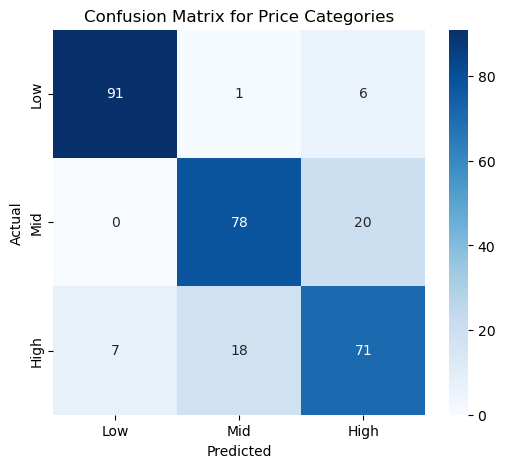

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Price Categories):")
print(classification_report(y_val_cat, y_pred_cat))

cm = confusion_matrix(y_val_cat, y_pred_cat)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Mid","High"], yticklabels=["Low","Mid","High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Price Categories")
plt.show()

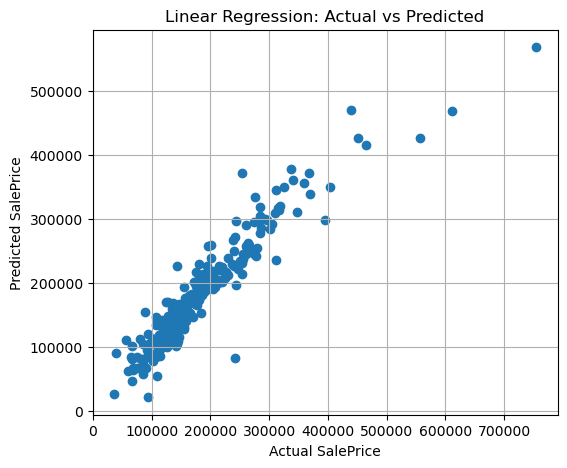

In [48]:
plt.figure(figsize=(6,5))
plt.scatter(y_val, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

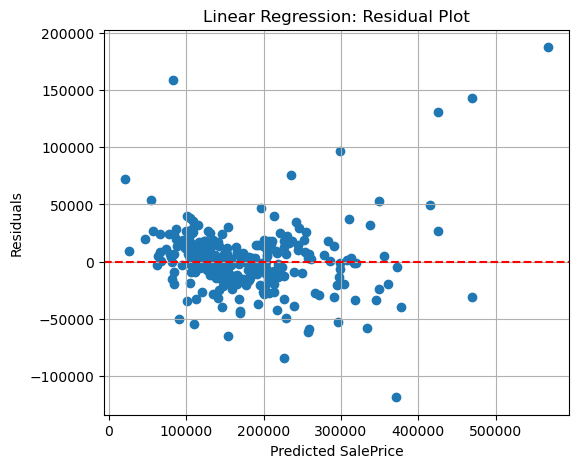

In [49]:
residuals = y_val - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.grid(True)
plt.show()

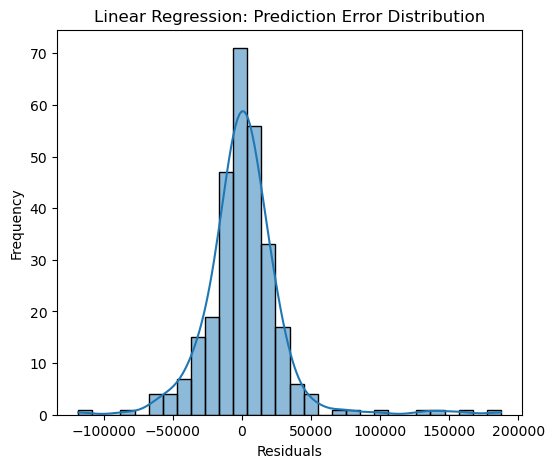

In [50]:
plt.figure(figsize=(6,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Linear Regression: Prediction Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()